In [380]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [381]:
# Load the data and check for redudancy 

df = pd.read_csv("churn.csv")

In [382]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [383]:
# drop the cust ID 
df.drop(columns=["customerID"], inplace=True) # inplace will drop from df and update df

df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [384]:
# Observe that the type of monthly charges in object and not float -> convert it !!


print(f"before dropping = ",df.shape)
x_ini = df.shape[0]

# Drop the columns that have " " in TotalCharges 
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA) # replace " " with NaN
df.dropna(subset=['TotalCharges'], inplace=True) # remove those which are not assigned and do it inplace 

# convert to int 
df.TotalCharges = pd.to_numeric(df.TotalCharges)

print(f"after dropping = ",df.shape)
x_fin = df.shape[0]

print(f"No of rows that were dropped :",x_ini-x_fin)
df.dtypes

before dropping =  (7043, 20)
after dropping =  (7032, 20)
No of rows that were dropped : 11


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

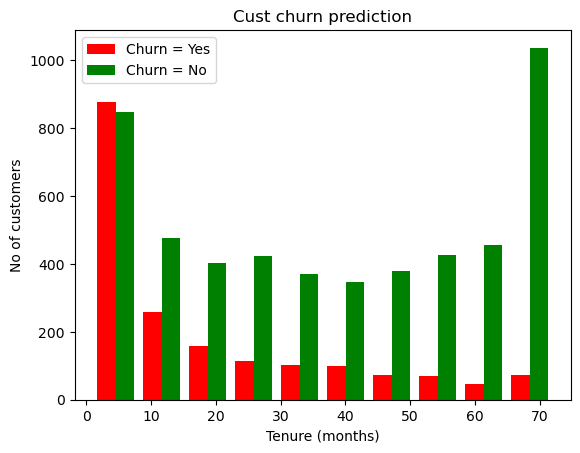

In [385]:
# now the totalcharges is in float format now 

# Visualising the data now 

# Plot tenure and churn 
churn_no_tenure = df[df.Churn =="No"].tenure
churn_yes_tenure = df[df.Churn =="Yes"].tenure



plt.hist([churn_yes_tenure,churn_no_tenure],color = ["red","green"],label = ["Churn = Yes","Churn = No"])
plt.xlabel("Tenure (months)")
plt.ylabel("No of customers")
plt.title("Cust churn prediction")
plt.legend() # to view the labe; 

# green = they are not leaving

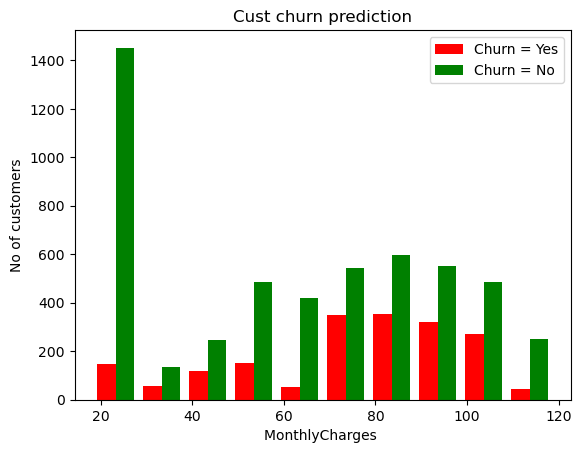

In [386]:
# Visualising the data now 

# Plot monthly and churn 
churn_no_mc = df[df.Churn =="No"].MonthlyCharges
churn_yes_mc = df[df.Churn =="Yes"].MonthlyCharges



plt.hist([churn_yes_mc,churn_no_mc],color = ["red","green"],label = ["Churn = Yes","Churn = No"])
plt.xlabel("MonthlyCharges ")
plt.ylabel("No of customers")
plt.title("Cust churn prediction")
plt.legend() # to view the labe; 

In [387]:
# check the unique values in each columns 
def print_unicol_values(df):
    for col in df:
        if df[col].dtypes == "object":
            print(f"{col}:{df[col].unique()}")
            

In [388]:
print_unicol_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [389]:
# replace the "no internet service" with "no"

df.replace("No internet service","No",inplace = True)
df.replace("No phone service","No",inplace = True)

print_unicol_values(df)


gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [390]:
# Model can;t handle any text data ! convert all of them to binary or hot encode it 

df.replace("No",0,inplace = True)
print_unicol_values(df)
# df.replace("Yes",1,inplace = True)
# print_unicol_values(df)

gender:['Female' 'Male']
Partner:['Yes' 0]
Dependents:[0 'Yes']
PhoneService:[0 'Yes']
MultipleLines:[0 'Yes']
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 'Yes']
OnlineBackup:['Yes' 0]
DeviceProtection:[0 'Yes']
TechSupport:[0 'Yes']
StreamingTV:[0 'Yes']
StreamingMovies:[0 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:[0 'Yes']


In [391]:
df.replace("Yes",1,inplace = True)
print_unicol_values(df)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 0]
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [392]:
df.dtypes
def print_unicol_values_int(df):
    for col in df:
        if df[col].dtypes == "int64" or df[col].dtypes == "float64":
            print(f"{col}:{df[col].unique()}")

In [393]:
print_unicol_values_int(df)

SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [394]:
for col in df:
    print(f"{col}:{df[col].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [395]:
# The internet service no also got replaced ! set it back 
df.InternetService.replace(0,"No",inplace = True)


In [396]:
def print_all_col(df):
    for col in df:
        print(f"{col}:{df[col].unique()}")
    

In [397]:
# convert the female and male 
# Female = 1 ; Male = 0 
df.replace("Female",1,inplace = True)
df.replace("Male",0,inplace = True)

print_all_col(df)

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [398]:
# since for some values we have more than 2 , we hot encode them using pandas dummies 
df.dtypes

df = pd.get_dummies(data = df,  columns = ["Contract","InternetService","PaymentMethod"])
df             

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,False,True,False,True,False,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,False,True,False,True,False,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,False,True,False,True,False,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,True,False,False,False,True,False,False,False,False,True


In [399]:
# df.columns
# convert the true to 1 and false to 0

# its of type bool and not string 
df.replace(True,1,inplace = True)
df.replace(False,0,inplace = True)

# print_all_col(df)
# df.dtypes

# df
df.shape
df.dtypes # everything is int / float -> so done 


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      int64
Contract_One year                            int64
Contract_Two year              

In [400]:
# tenure , monthly charges and total charges are not in range of (0,1)

# we just scale it now 
scale_col = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

df[scale_col] = scaler.fit_transform(df[scale_col])

In [401]:
print_all_col(df)

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [402]:
# Data cleaning and scaling is done 

# Loading the training set

y_train = df.Churn
x_train = df.drop(columns = "Churn")


In [403]:
# split into training and test set 

from sklearn.model_selection import train_test_split
x_train, x_test , y_train  , y_test = train_test_split(x_train ,y_train , test_size = 0.2 , random_state = 267) # random state -> shuffles the same everytime we run it 

In [404]:
print(x_train)
print(x_train.shape)

print(y_train)
print(y_train.shape)

print(x_test)
print(x_test.shape)

print(y_test)
print(y_test.shape)


      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3607       1              0        0           0  0.169014             1   
1219       1              0        1           1  0.859155             1   
1383       1              0        0           0  0.000000             1   
5549       1              0        0           0  0.028169             1   
3778       0              0        0           0  0.028169             1   
...      ...            ...      ...         ...       ...           ...   
1342       1              0        0           0  0.098592             1   
4987       0              0        1           0  0.985915             1   
2105       1              0        0           0  0.028169             1   
6333       1              1        0           0  0.830986             1   
1486       1              0        0           0  0.014085             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
3607       

In [405]:
# save the training data
# Save our data -> use pickle ( for safety -> to use later ) 
import pickle

pickle_out = open("x_train.pickle","wb")
pickle.dump(x_train , pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train , pickle_out)
pickle_out.close()


pickle_out = open("x_test.pickle","wb")
pickle.dump(x_test , pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test , pickle_out)
pickle_out.close()
